In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We are importing libraries we required.

In [3]:
df = pd.read_csv(r'C:/Users/Lenovo/Downloads/Machine Learning/Netflix/combined_data_1.txt')

We are loading the data.

In [4]:
df.head(10)

,,1:
1488844,3.0,2005-09-06
822109,5.0,2005-05-13
885013,4.0,2005-10-19
30878,4.0,2005-12-26
823519,3.0,2004-05-03
893988,3.0,2005-11-17
124105,4.0,2004-08-05
1248029,3.0,2004-04-22
1842128,4.0,2004-05-09
2238063,3.0,2005-05-11


We are checking the data so we can know th detail of rows and columns in it.

In [5]:
df.tail(10)

,,1:
272857,4.0,2005-06-22
185372,1.0,2004-06-07
2219917,3.0,2004-05-03
1796454,1.0,2004-07-07
2562830,4.0,2004-06-19
2591364,2.0,2005-02-16
1791000,2.0,2005-02-10
512536,5.0,2005-07-27
988963,3.0,2005-12-20
1704416,3.0,2004-06-02


This is a last 10 datas from the dataset.

In [7]:
netflix_dataset = pd.read_csv(r'C:/Users/Lenovo/Downloads/Machine Learning/Netflix/combined_data_1.txt.zip',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])

This line reads a zipped Netflix dataset (combined_data_1.txt.zip) as a CSV file using pandas.read_csv().
It assigns column names 'Cust_Id' and 'Rating', and loads only the first two columns (indices 0 and 1) without any header from the file.

In [8]:
netflix_dataset.head(100)

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
95,1245406,4.0
96,1834590,3.0
97,593225,3.0
98,1011918,4.0


After assign the two columns we are checking for the data in it.

In [9]:
netflix_dataset.tail()

,Cust_Id,Rating
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0
24058262,1704416,3.0


In [10]:
netflix_dataset.dtypes

Cust_Id     object
Rating     float64
dtype: object

We are checking the datatype of data.

In [11]:
netflix_dataset.shape

(24058263, 2)

We are checking the shape of the data(i.e.,) it has 24058263 rows and 2 columns.

In [12]:
#get the customer count with NaN values
movie_count=netflix_dataset.isnull().sum()
movie_count

Cust_Id       0
Rating     4499
dtype: int64

We are checking for the null value.It seems Cust_Id dont have null value and rating have 4499 null values.

In [13]:
movie_count=movie_count["Rating"]
movie_count

4499

We are assigning movie_count as Rating from the dataset.

In [14]:
customer_count=netflix_dataset['Cust_Id'].nunique()

It calculates the number of unique customer IDs in the dataset.

In [15]:
netflix_dataset['Cust_Id']

0                1:
1           1488844
2            822109
3            885013
4             30878
             ...   
24058258    2591364
24058259    1791000
24058260     512536
24058261     988963
24058262    1704416
Name: Cust_Id, Length: 24058263, dtype: object

We have seperated the Cust_Id.

In [16]:
customer_count

475257

Now we got the total number of customer count from the dataset.1

In [17]:
customer_count=customer_count-movie_count
customer_count

470758

We are calculating customer_count by subtracting customer_count from movie_count.

In [18]:
#get the total number of ratings given by the customers
rating_count=netflix_dataset['Cust_Id'].count()-movie_count
rating_count

24053764

We have calculated rating_count by subtracting Cust_Id count from movie_count.

In [19]:
netflix_dataset['Rating'].count()

24053764

In [20]:
stars=netflix_dataset.groupby('Rating')['Rating'].agg(['count'])

Now we are calculation the rating(i.e.,)stars given by the customer of how much they like the movie.

In [21]:
stars

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


Now we got the count of the each star rating. Now we can see how many people have given 1,2,3,4,5 stars. 

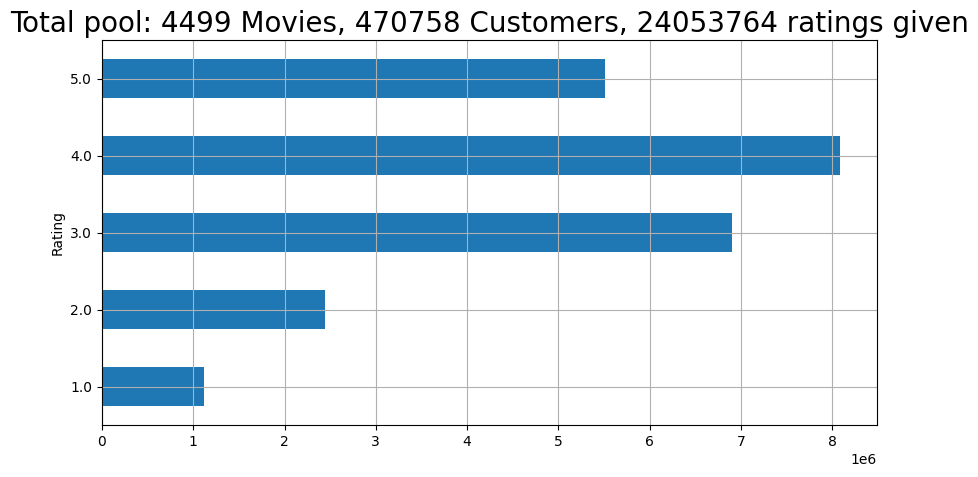

In [22]:
ax=stars.plot(kind='barh', legend=False, figsize=(10,5))
plt.title(f'Total pool: {movie_count} Movies, {customer_count} Customers, {rating_count} ratings given', fontsize=20)
plt.grid(True)

It creates a horizontal bar chart of the stars data to visualize rating distribution.The chart title summarizes the dataset with total movies, unique customers, and total ratings.

In [23]:
df_nan=pd.DataFrame(pd.isnull(netflix_dataset.Rating))

It is used to check whether their is a null value in Rating column.It is indicated by boolean value(true or false).

In [24]:
df_nan

,Rating
0,True
1,False
2,False
3,False
4,False
...,...
24058258,False
24058259,False
24058260,False
24058261,False


It is indicated with true and false.

In [25]:
df_nan=df_nan[df_nan['Rating']==True]
df_nan

,Rating
0,True
548,True
694,True
2707,True
2850,True
...,...
24046714,True
24047329,True
24056849,True
24057564,True


It now show which are the data have null value.

In [26]:
df_nan.shape

(4499, 1)

Now we got 4499 rows and 1 columns of missing values.

In [27]:
df_nan.head()

,Rating
0,True
548,True
694,True
2707,True
2850,True


In [28]:
df_nan.tail()

,Rating
24046714,True
24047329,True
24056849,True
24057564,True
24057834,True


In [29]:
df_nan=df_nan.reset_index()

It converts the old index into a column and creating a new default integer index.

In [30]:
df_nan

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True
...,...,...
4494,24046714,True
4495,24047329,True
4496,24056849,True
4497,24057564,True


Now we have 4499 rows and 2 columns.

In [31]:
df_nan['index'][1:]

1            548
2            694
3           2707
4           2850
5           3991
          ...   
4494    24046714
4495    24047329
4496    24056849
4497    24057564
4498    24057834
Name: index, Length: 4498, dtype: int64

It take all data except the first index (i.e.,)0

In [32]:
df_nan['index'][:-1]

0              0
1            548
2            694
3           2707
4           2850
          ...   
4493    24046583
4494    24046714
4495    24047329
4496    24056849
4497    24057564
Name: index, Length: 4498, dtype: int64

It take the value from last index value to first index value..

In [33]:
#now we will create a numpy array that will contain 1 from values 0 to 547, 2 from 549 to 693 and so on
movie_np=[]
movie_id=1
for i, j in zip(df_nan['index'][1:], df_nan['index'][:-1]):
    temp=np.full((1, i-j-1), movie_id)
    movie_np=np.append(movie_np, temp)
    movie_id+=1

#account for last record and corresponding length
#numpy approach
last_record=np.full((1, len(netflix_dataset)-df_nan.iloc[-1,0]-1), movie_id)#movie id will be 4499
movie_np=np.append(movie_np, last_record)

This loop assigns a unique movie_id to each block of ratings between missing Rating entries (which indicate a new movie) using their row indices. The last_record line ensures the final movie's ratings are labeled correctly by handling rows after the last NaN, and all IDs are stored in movie_np.

In [34]:
np.full((1,0),1)

array([], shape=(1, 0), dtype=int32)

It creates a NumPy array with shape (1, 0), meaning one row and zero columns. It results in an empty array, as there are no columns to fill, even though the fill value is 1.

In [35]:
df_nan.iloc[-1,0]

24057834

It retrieves the value from the last row and first column of the data.

In [36]:
df_nan.iloc[-1,0]-1

24057833

It subtracts 1 from the index of the last missing rating in the dataset.

In [37]:
len(netflix_dataset)

24058263

It calculate the length of the dataset.

In [38]:
movie_np

array([1.000e+00, 1.000e+00, 1.000e+00, ..., 4.499e+03, 4.499e+03,
       4.499e+03])

movie_np is a NumPy array that maps each customer rating in the Netflix dataset to its corresponding movie ID.

In [39]:
movie_np[-20:-1]

array([4499., 4499., 4499., 4499., 4499., 4499., 4499., 4499., 4499.,
       4499., 4499., 4499., 4499., 4499., 4499., 4499., 4499., 4499.,
       4499.])

movie_np[-20:-1] returns the last 19 elements (excluding the final one) of the movie_np array.

In [40]:
netflix_dataset=netflix_dataset[pd.notnull(netflix_dataset['Rating'])]
netflix_dataset['Movie_Id']=movie_np.astype(int)
# netflix_dataset['Cust_Id']=netflix_dataset['Cust_Id'].astype(int)
print("Now the dataset will look like: ")
netflix_dataset.head()

Now the dataset will look like: 


,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


In [41]:
netflix_dataset.tail()

,Cust_Id,Rating,Movie_Id
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499
24058262,1704416,3.0,4499


In [42]:
dataset_movie_summary=netflix_dataset.groupby('Movie_Id')['Rating'].agg(["count"])

This line groups the netflix_dataset by Movie_Id and calculates the count of ratings for each movie. The result is stored in dataset_movie_summary, showing how many ratings each movie has received.

In [43]:
dataset_movie_summary


,count
Movie_Id,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


In [44]:
dataset_movie_summary.index=dataset_movie_summary.index.map(int)

It converts the index of dataset_movie_summary (which contains Movie_Ids) from default or object type to integers.

In [45]:
dataset_movie_summary["count"].quantile(0.7)

1798.6

In [46]:
movie_benchmark=round(dataset_movie_summary['count'].quantile(0.7),0)
movie_benchmark

1799.0

It calculates the 70th percentile (quantile = 0.7) of the number of ratings each movie received, rounding the result.

In [47]:
dataset_movie_summary['count']

Movie_Id
1        547
2        145
3       2012
4        142
5       1140
        ... 
4495     614
4496    9519
4497     714
4498     269
4499     428
Name: count, Length: 4499, dtype: int64

In [48]:
drop_movie_list=dataset_movie_summary[dataset_movie_summary['count']<movie_benchmark].index
drop_movie_list

Index([   1,    2,    4,    5,    6,    7,    9,   10,   11,   12,
       ...
       4484, 4486, 4487, 4489, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int32', name='Movie_Id', length=3149)

It identifies movies with fewer ratings than the benchmark (70th percentile) and stores their IDs in drop_movie_list.

In [49]:
dataset_cust_summary=netflix_dataset.groupby('Cust_Id')['Rating'].agg(["count"])
dataset_cust_summary

,count
Cust_Id,
10,49
1000004,1
1000027,30
1000033,101
1000035,20
...,...
999964,48
999972,35
999977,14


It groups the Netflix dataset by each customer (Cust_Id) and calculates how many ratings each customer has given using .agg(["count"]).

In [50]:
dataset_cust_summary['count'].quantile(0.7)

52.0

In [51]:
cust_benchmark=round(dataset_cust_summary['count'].quantile(0.7),0)
cust_benchmark

52.0

It calculates the 70th percentile (quantile 0.7) of the rating counts given by customers, rounding it to the nearest whole number. The result (cust_benchmark) is used as a threshold to identify the top 30% most active users for further analysis or filtering.

In [52]:
drop_cust_list=dataset_cust_summary[dataset_cust_summary['count']<cust_benchmark].index
drop_cust_list

Index(['10', '1000004', '1000027', '1000035', '1000038', '1000051', '1000057',
       '100006', '100007', '1000072',
       ...
       '999932', '999935', '99994', '999945', '999949', '999964', '999972',
       '999977', '999984', '999988'],
      dtype='object', name='Cust_Id', length=327300)

The drop_cust_list contains the IDs of less active users, which can be used to reduce data sparsity or noise in further analysis.

In [53]:
print('The original dataframe has: ', netflix_dataset.shape, 'shape')

The original dataframe has:  (24053764, 3) shape


In [54]:
netflix_dataset=netflix_dataset[~netflix_dataset['Movie_Id'].isin(drop_movie_list)]
netflix_dataset=netflix_dataset[~netflix_dataset['Cust_Id'].isin(drop_cust_list)]
print('After the trimming, the shape is: {}'.format(netflix_dataset.shape))

After the trimming, the shape is: (17337458, 3)


It removes less popular movies and less active customers from the netflix_dataset using the lists drop_movie_list and drop_cust_list.

In [55]:
netflix_dataset.head()

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3
